## Loan Analysis

### About the Data

The dataset contains several information regarding the details of loans. It consists of 19 columns such as the credit score, annual income, loan status, and other information related to a loan.

### Objective
We want to know what factors make a loan to be charged off. We should try to answer these questions to find out :
1. How are the characteristics of the customers?
2. What kind of customers loan that are more likely to be charged off?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("Credit.csv")
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first thing we can notice is that there are plenty of empty values at the bottom of the dataset. So we should check for the missing data in the dataset

In [3]:
df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [4]:
df.shape

(100514, 19)

In [5]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

Most columns contain around 514 missing values, while some values have a larger amount of missing data. We should deal with the larger amount first.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


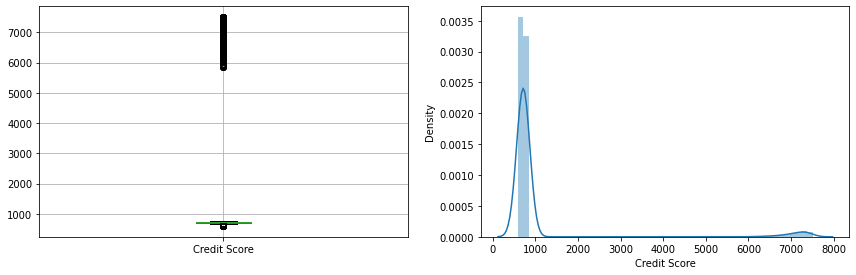

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)

df.boxplot(ax = ax1 ,column = 'Credit Score')
sns.distplot(df['Credit Score'], ax = ax2)

plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

First is the column "Credit Score". From the graphs above we can see that there are some numbers of outliers in the column "Credit Score" so we should fill the missing values with the columns median.

In [7]:
df['Credit Score'].fillna(df['Credit Score'].median(), inplace = True)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

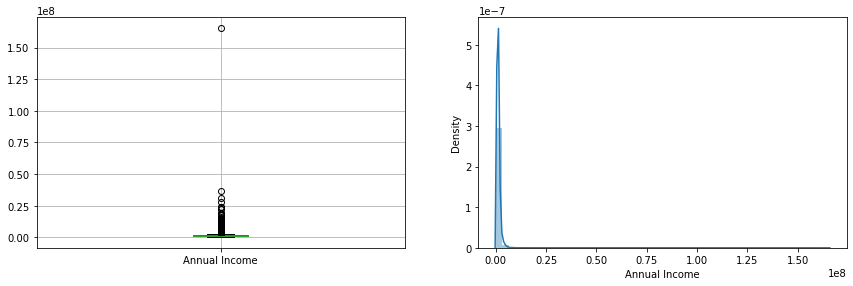

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)

df.boxplot(ax = ax1 ,column = 'Annual Income')
sns.distplot(df['Annual Income'], ax = ax2)

plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

plt.plot()

Above is the graph of the column "Annual Income". There are also some numbers of outliers based on what can we see from the graph. We should also replace the empty rows with the columns median.

In [9]:
df['Annual Income'].fillna(df['Annual Income'].median(), inplace = True)

In [10]:
df['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

Next is the column 'Years in current job'. We should try to see if the missing values is really a missing values, or does it represent 0 Years in current job such as a student/fresh graduate/retired.

[]

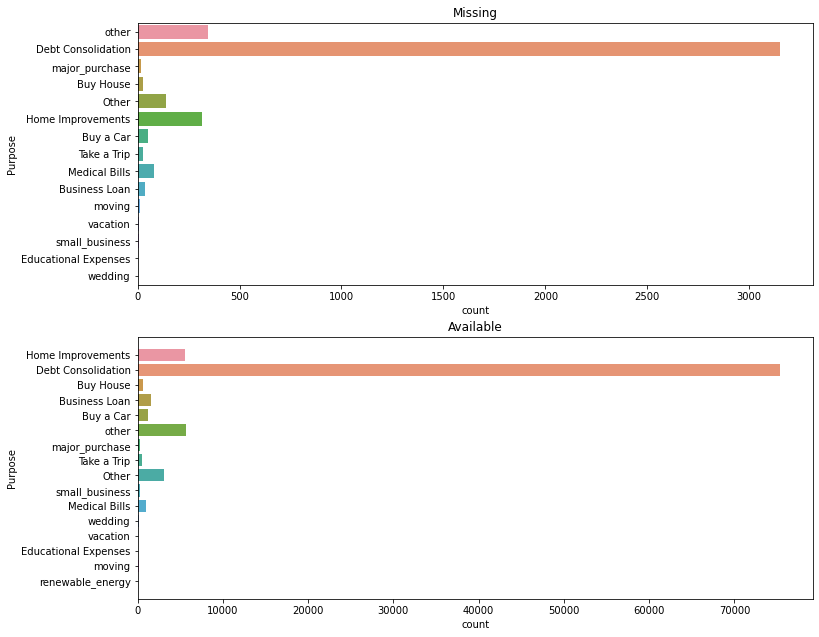

In [11]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 10))

sns.countplot(y = df[df['Years in current job'].isna()]['Purpose'], ax = ax1)
sns.countplot(y = df[~df['Years in current job'].isna()]['Purpose'], ax = ax2)

ax1.title.set_text('Missing')
ax2.title.set_text('Available')
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

plt.plot()

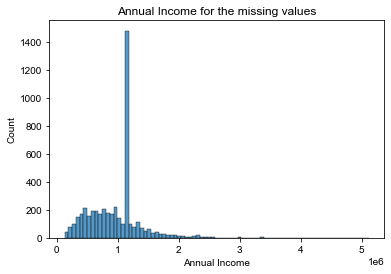

In [12]:
sns.histplot(x = df[df['Years in current job'].isna()]['Annual Income']).set(title='Annual Income for the missing values')
sns.set(rc = {'figure.figsize':(14, 8)})

We can also see the annual income for the missing rows. Since all of the missing rows have annual income, we can assume that most of the missing values in the column "Years in the job" is not zero.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Years in current job', ylabel='count'>

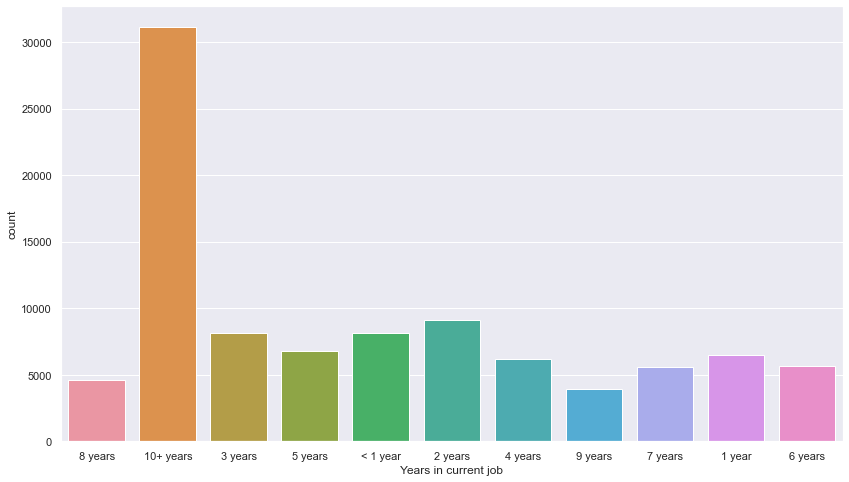

In [13]:
sns.countplot(df['Years in current job'])

From the graph above we can see the distribution for the years in current job is distributed pretty evelny, except for the number of people having 10+ years in their current job.

In [14]:
income_years = df.groupby(['Years in current job'])['Annual Income'].mean().reset_index()

In [15]:
income_years

,Years in current job,Annual Income
0,1 year,1.272745e+06
1,10+ years,1.454101e+06
2,2 years,1.304652e+06
3,3 years,1.307524e+06
4,4 years,1.294308e+06
5,5 years,1.314210e+06
6,6 years,1.312781e+06
7,7 years,1.352271e+06
8,8 years,1.365600e+06
9,9 years,1.376205e+06


<AxesSubplot:xlabel='Years in current job', ylabel='Annual Income'>

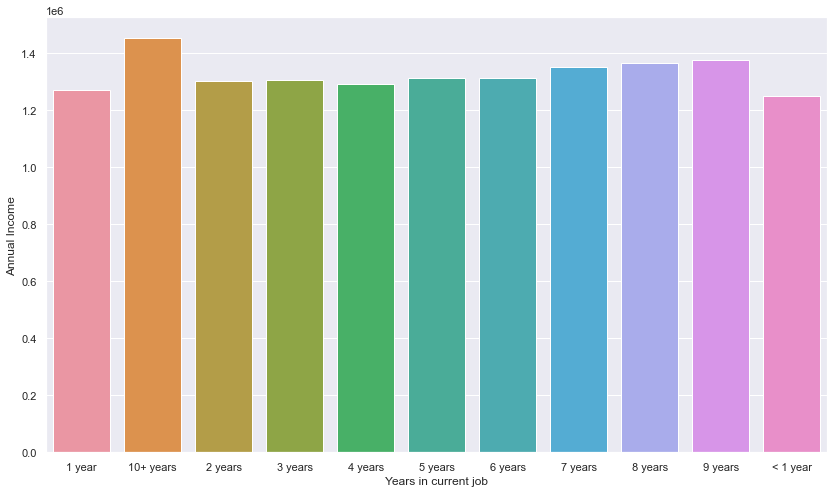

In [16]:
sns.barplot(data = income_years, x = 'Years in current job', y = 'Annual Income',)

From the graph above we can see the mean income for each year does not have much difference, so we should fill in the empty rows with random data based on the available values.

In [17]:
df['Years in current job'].fillna(np.random.choice(df['Years in current job'][df['Years in current job'].notna()]), inplace=True)

In [18]:
df['Years in current job'].isna().sum()

0

In [19]:
df['Years in current job'].value_counts()

10+ years    31121
6 years      10422
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

<AxesSubplot:xlabel='Months since last delinquent', ylabel='Count'>

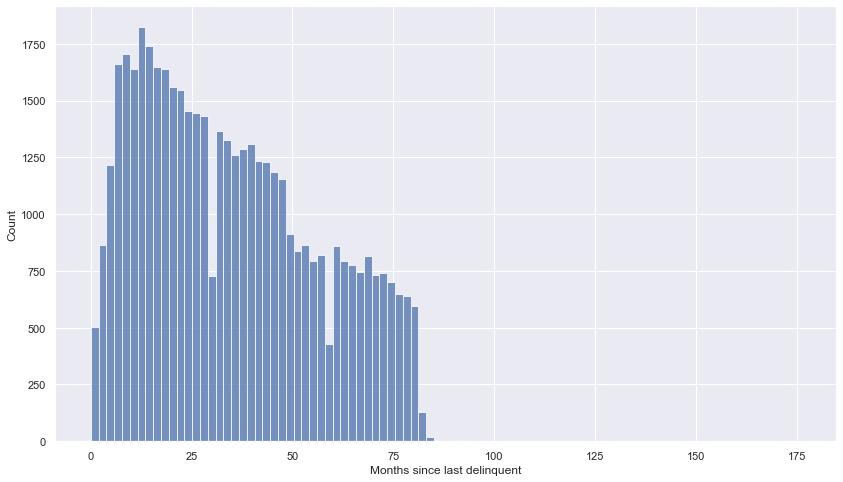

In [20]:
sns.histplot(df['Months since last delinquent'])

Next is the column "Months since last deliquent". We should also see if the missing values represent zero or if they are missing for any other reasons.

In [21]:
df[df['Months since last delinquent'] == 0].shape

(216, 19)

Since there are rows with the value 0 in the column, we can assume that the missing values are not zero and they are missing for another reason. I'm going to assume that the missing values are for those who have never been deliquent before, and the value 0 means that the person is in deliquent. So to differentiate between the two group we should put them into categories.

In [30]:
x = df[df['Months since last delinquent'].isna()]

In [33]:
x[x['Loan Status'] == "Charged Off"]['Annual Income']

5         896857.0
16       1174162.0
22       1890690.0
32        524609.0
43        537472.0
           ...    
99947    1681101.0
99954    1613062.0
99963    1046805.0
99988    1174162.0
99989    1174162.0
Name: Annual Income, Length: 12230, dtype: float64

<AxesSubplot:xlabel='Loan Status', ylabel='Credit Score'>

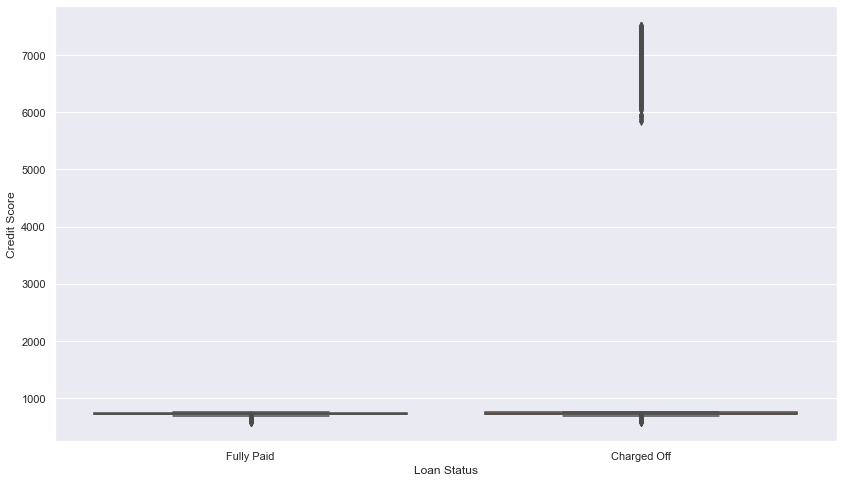

In [35]:
sns.boxplot(y = 'Credit Score', x = 'Loan Status', data = x)

<AxesSubplot:xlabel='Credit Score', ylabel='Annual Income'>

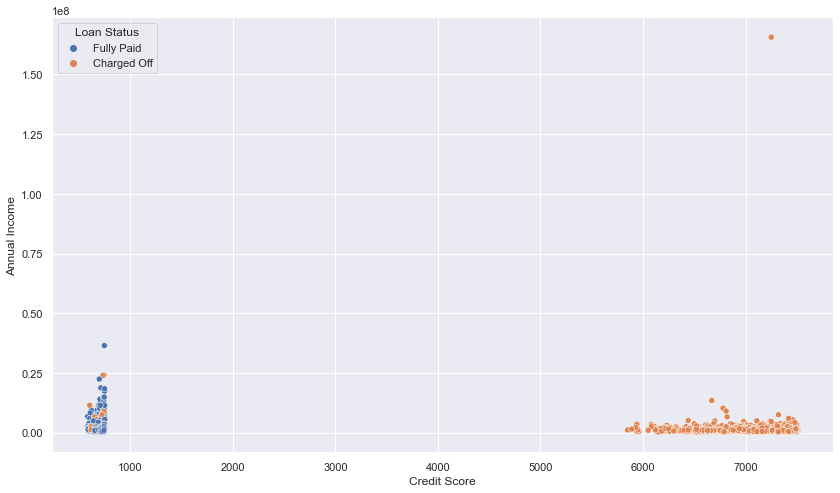

In [38]:
sns.scatterplot(data = x, x = 'Credit Score', y = 'Annual Income', hue = 'Loan Status')

In [41]:
Deliquent = pd.cut(df['Months since last delinquent'], bins = [0,1,12,60], labels = 
                  ['1 - 12 months', '12 - 60 months','60 months'])
Deliquent.value_counts()

60 months         30543
12 - 60 months     7987
1 - 12 months       289
Name: Months since last delinquent, dtype: int64

In [42]:
df['Deliquent'] = Deliquent
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Deliquent
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,NaN
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,12 - 60 months
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,60 months
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,NaN
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,724.0,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df['Deliquent'] = df['Deliquent'].astype("object")
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
Deliquent                        object
dtype: object

In [44]:
df['Deliquent'].fillna('0 months', inplace = True)
df['Deliquent'].value_counts()

0 months          61695
60 months         30543
12 - 60 months     7987
1 - 12 months       289
Name: Deliquent, dtype: int64

In [45]:
df.drop("Months since last delinquent", axis = 1, inplace = True)
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Deliquent
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0 months
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,12 - 60 months
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,60 months
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0 months
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,724.0,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 months
100510,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 months
100511,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 months
100512,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 months


Since we already have the new column with categories of deliquent, we should drop the previous column "Month since last deliquent"

Next, we should see the column "Bankruptcies" and see if the missing values is supposed to be zero

In [46]:
df['Bankruptcies'].value_counts()

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

Since we have plenty of 0 values in the bankruptcies column, we can assume that the missing values are not 0, and because most of the value in the column is 0, we should replace the missing values the mode.

In [47]:
df['Bankruptcies'].fillna(df['Bankruptcies'].mode().iat[0], inplace = True)

In [48]:
df['Bankruptcies'].isna().sum()

0

In [49]:
df.isna().sum()

Loan ID                      514
Customer ID                  514
Loan Status                  514
Current Loan Amount          514
Term                         514
Credit Score                   0
Annual Income                  0
Years in current job           0
Home Ownership               514
Purpose                      514
Monthly Debt                 514
Years of Credit History      514
Number of Open Accounts      514
Number of Credit Problems    514
Current Credit Balance       514
Maximum Open Credit          516
Bankruptcies                   0
Tax Liens                    524
Deliquent                      0
dtype: int64

Next we should see the rest of missing values.

In [50]:
df[df['Loan ID'].isna()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Deliquent
100000,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0 months
100001,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0 months
100002,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0 months
100003,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0 months
100004,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0 months
100510,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0 months
100511,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0 months
100512,NaN,NaN,NaN,NaN,NaN,724.0,1174162.0,< 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0 months


we can see that the rest of missing values are missing values from all columns, we should just drop those rows. As for the column "Maximum Open Credit" and "Tax Liens", since they only have very little missing values (2 and 10 missing values respectively), we should just drop them along with the 514 missing rows.

In [51]:
df.dropna(inplace = True)

In [52]:
df.isna().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Deliquent                    0
dtype: int64

In [53]:
df.shape

(99988, 19)

Lastly we should drop any duplicates on the dataset.

In [54]:
df.drop_duplicates(inplace = True)

In [55]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Deliquent
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0 months
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,12 - 60 months
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,60 months
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0 months
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,724.0,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0,60 months
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,60 months
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,60 months
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,0 months


Now we have completely removed the missing values from the dataset, we should try to look into the relation between the Loan Status and other variables. 

In [56]:
df['Loan Status'].value_counts()

Fully Paid     67137
Charged Off    22637
Name: Loan Status, dtype: int64

In [57]:
fully_paid = df[df['Loan Status'] == 'Fully Paid']
charged_off = df[df['Loan Status'] == 'Charged Off']

In [58]:
df.dtypes

Loan ID                       object
Customer ID                   object
Loan Status                   object
Current Loan Amount          float64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
Deliquent                     object
dtype: object

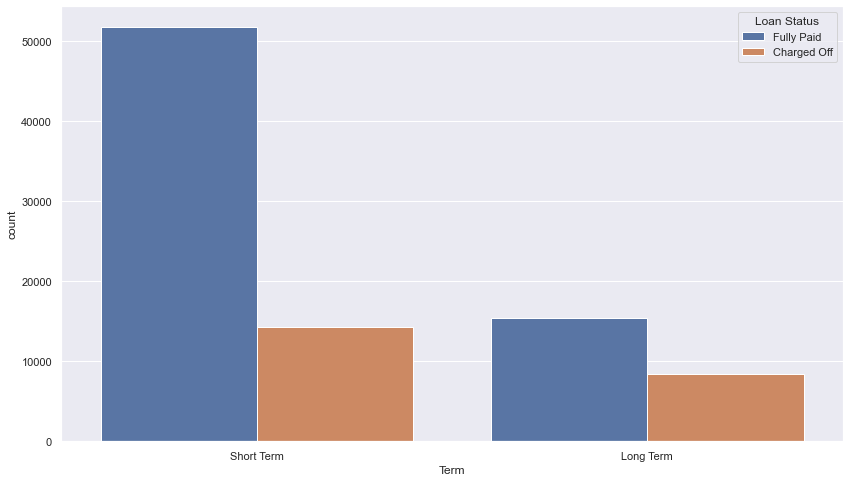

In [59]:
sns.countplot(data = df, x = 'Term', hue = 'Loan Status')
sns.set(rc = {'figure.figsize':(8, 6)})

In [60]:
print("Long Term charged off percentage =",
      charged_off[charged_off['Term'] == 'Long Term'].value_counts().sum()/fully_paid[fully_paid['Term'] == 'Long Term'].value_counts().sum(),
     "\nShort Term charged off percentage =",
      charged_off[charged_off['Term'] == 'Short Term'].value_counts().sum()/fully_paid[fully_paid['Term'] == 'Short Term'].value_counts().sum()
     )

Long Term charged off percentage = 0.5433878929592102 
Short Term charged off percentage = 0.27581608395663015


From the graph above, we can see that there is a larger percentage of loan being charge off for a long term loan compared for the short term loans. This make sense because in a longer term loan there are more uncertainties that can cause someone to fail to pay their loan back.

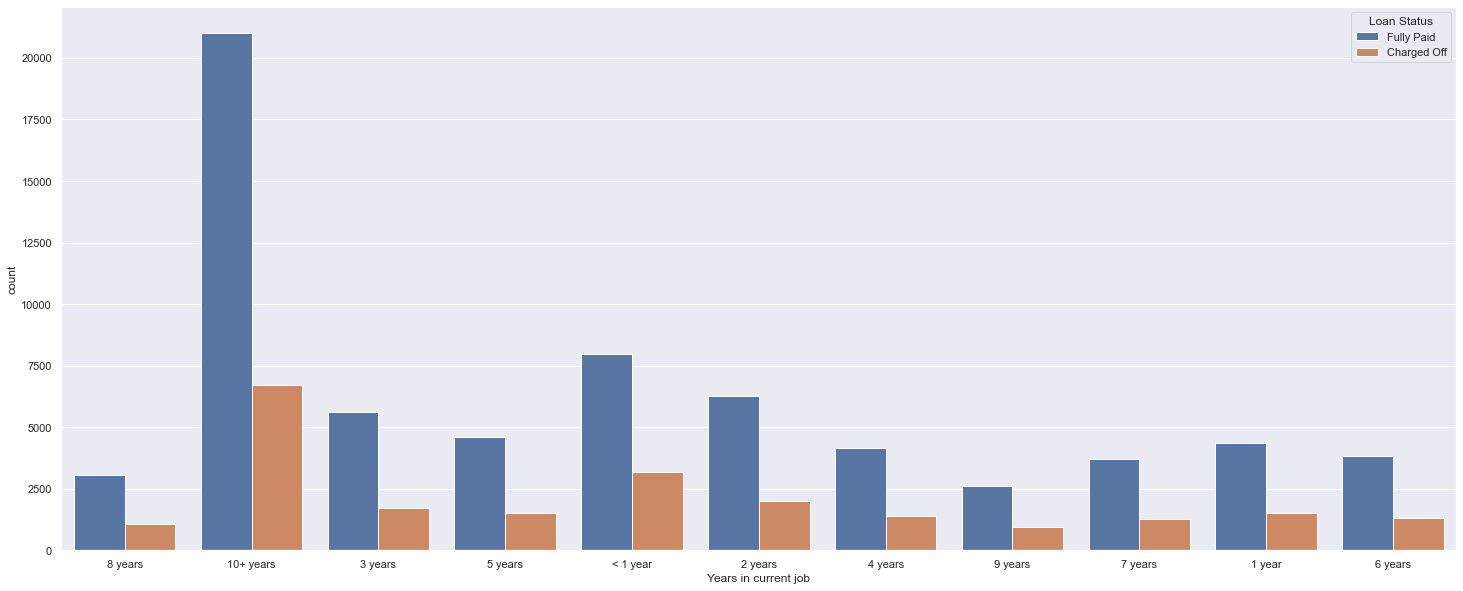

In [62]:
sns.countplot(data = df, x = 'Years in current job', hue = 'Loan Status')
sns.set(rc = {'figure.figsize':(20, 10)})

In [67]:
for j in ([i for i in df['Years in current job'].unique()]):
    print("Charge off Percentage for %s ="%j,
          charged_off[charged_off['Years in current job'] == j].value_counts().sum()/fully_paid[fully_paid['Years in current job'] == j].value_counts().sum()
         )

Charge off Percentage for 8 years = 0.34245682632779406
Charge off Percentage for 10+ years = 0.3196861626248217
Charge off Percentage for 3 years = 0.3084328757354252
Charge off Percentage for 5 years = 0.3327541268462207
Charge off Percentage for < 1 year = 0.3983464862833521
Charge off Percentage for 2 years = 0.32005758157389635
Charge off Percentage for 4 years = 0.33276904474002417
Charge off Percentage for 9 years = 0.3617511520737327
Charge off Percentage for 7 years = 0.3484725601513923
Charge off Percentage for 1 year = 0.3441678192715537
Charge off Percentage for 6 years = 0.34609334032511796


<AxesSubplot:>

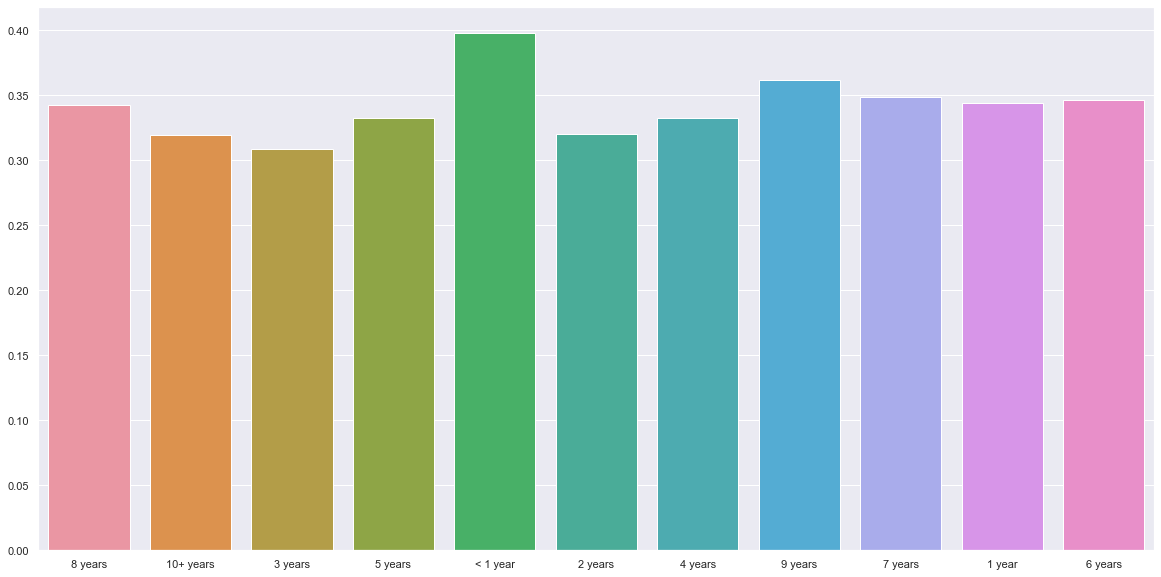

In [71]:
x = [i for i in df['Years in current job'].unique()]
y = [charged_off[charged_off['Years in current job'] == j].value_counts().sum()/fully_paid[fully_paid['Years in current job'] == j].value_counts().sum() for j in x]
sns.barplot(x = x, y = y)

The highest percentage for charge off is for the loan with <1 year of current job, but we cannot see much difference between the loan status and the Years in current job.

In [72]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

There seems to be double unique values which is HaveMortgage and Home Mortgage, so we just replace them and make them the same value.

In [74]:
df['Home Ownership'] = np.where(df['Home Ownership'] == 'HaveMortgage', 'Home Mortgage', df['Home Ownership'])

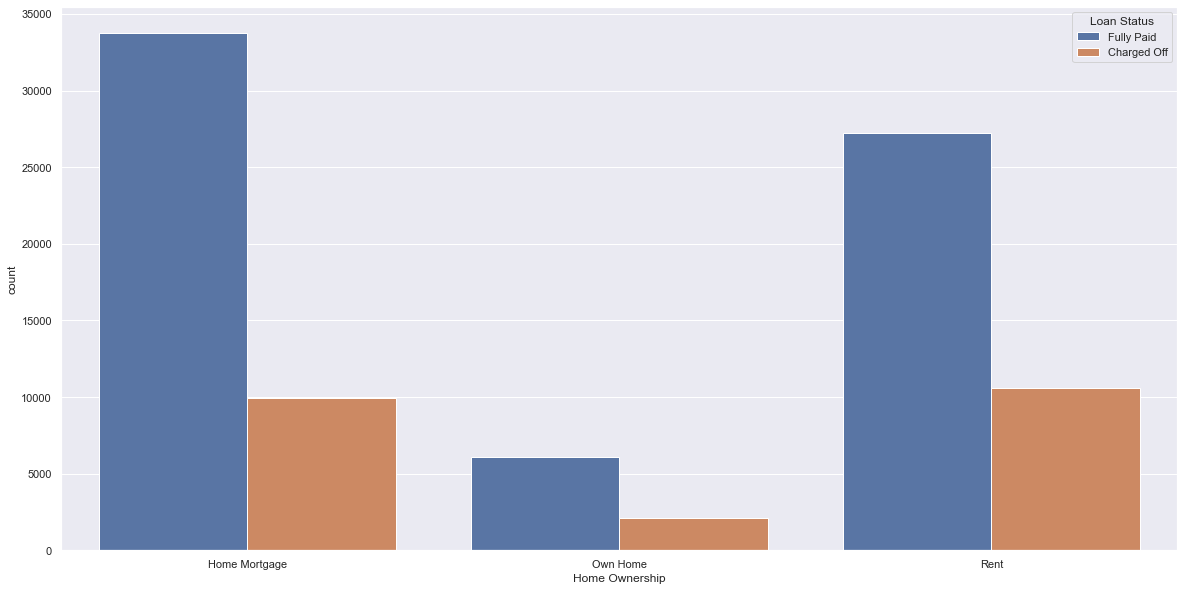

In [75]:
sns.countplot(data = df, x = 'Home Ownership', hue = 'Loan Status')
sns.set(rc = {'figure.figsize':(5, 8)})

<AxesSubplot:>

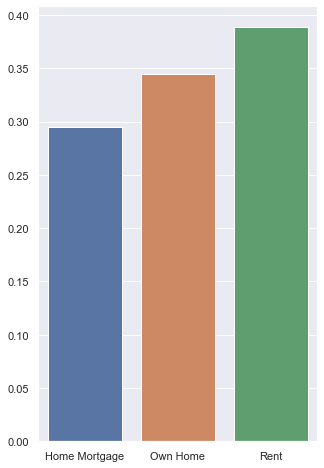

In [77]:
x = [i for i in df['Home Ownership'].unique()]
y = [charged_off[charged_off['Home Ownership'] == j].value_counts().sum()/fully_paid[fully_paid['Home Ownership'] == j].value_counts().sum() for j in x]
sns.barplot(x = x, y = y)

There are a larger number of charged off loans for people that are still renting for their home, but the difference is not too big

In [78]:
df['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

Duplicate values 'other' and 'Other'. We should replace them to 'other'

In [79]:
df['Purpose'] = np.where(df['Purpose'] == 'Other', 'other', df['Purpose'])

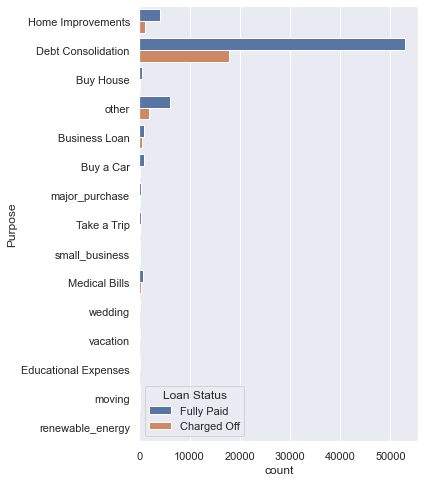

In [80]:
sns.countplot(data = df, y = 'Purpose', hue = 'Loan Status')
sns.set(rc = {'figure.figsize':(10, 10)})

<AxesSubplot:>

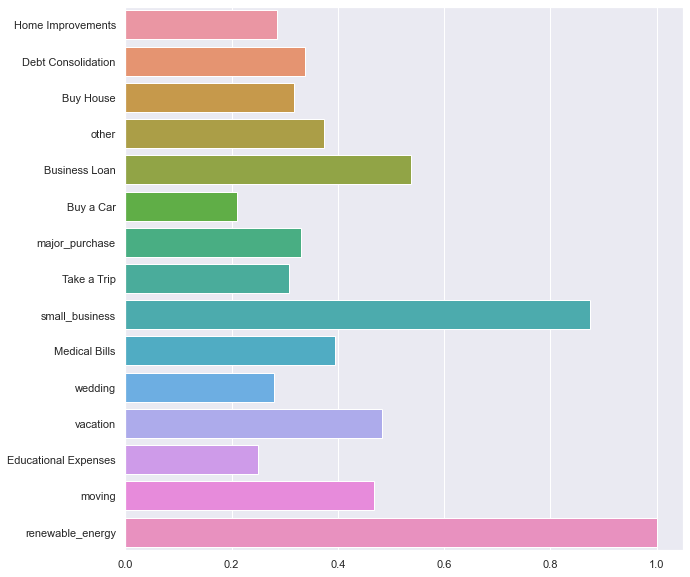

In [82]:
y = [i for i in df['Purpose'].unique()]
x = [charged_off[charged_off['Purpose'] == j].value_counts().sum()/fully_paid[fully_paid['Purpose'] == j].value_counts().sum() for j in x]
sns.barplot(x = x, y = y)

We can see a very high number of charged off rate for some values such ass renewable energy and small business but both are values with extremly low counts so we cannot get much from them. Debt consolidation, and Home improvements made the majority of the loan purposes but have a relatively low charged off percentage.

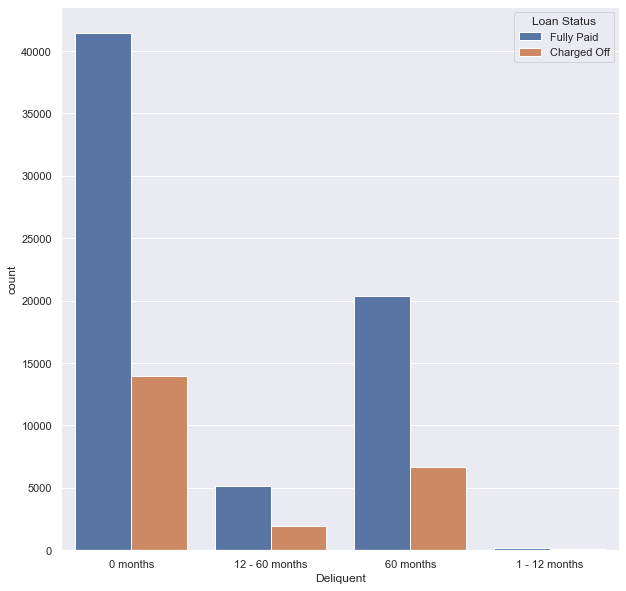

In [84]:
sns.countplot(data = df, x = 'Deliquent', hue = 'Loan Status')
sns.set(rc = {'figure.figsize':(8, 6)})

<AxesSubplot:>

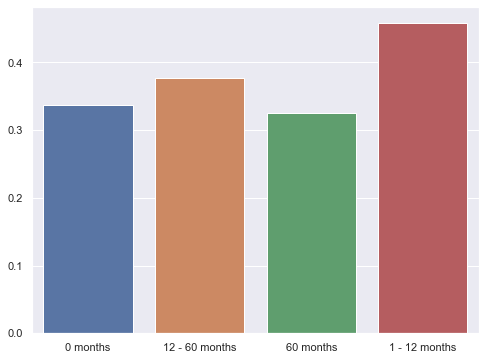

In [86]:
x = [i for i in df['Deliquent'].unique()]
y = [charged_off[charged_off['Deliquent'] == j].value_counts().sum()/fully_paid[fully_paid['Deliquent'] == j].value_counts().sum() for j in x]
sns.barplot(x = x, y = y)

People with months since their last deliquent with <13 months have the most charged off percentage, but they are only a small number with that value.

<AxesSubplot:xlabel='Loan Status', ylabel='Annual Income'>

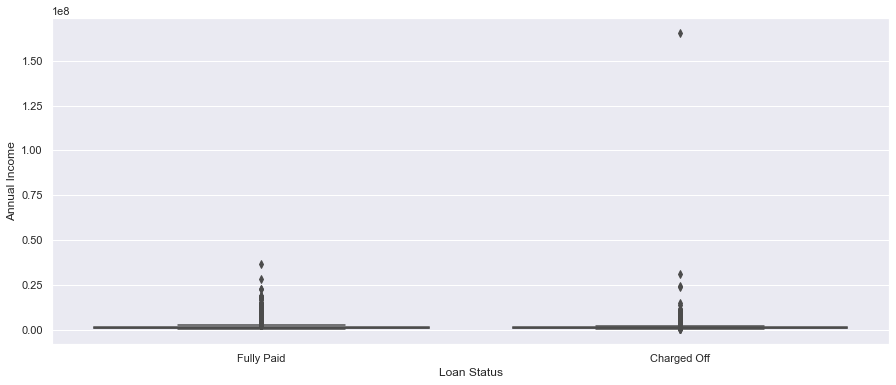

In [99]:
sns.boxplot(y = 'Annual Income', x = 'Loan Status', data = df)

We can see from the graphs that there is almost no difference between charged off and fully paid loan in terms of the annual income.

<AxesSubplot:xlabel='Loan Status', ylabel='Credit Score'>

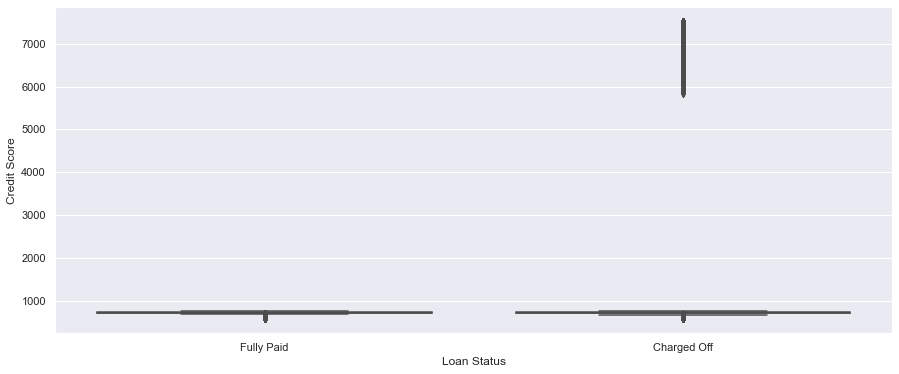

In [100]:
sns.boxplot(y = 'Credit Score', x = 'Loan Status', data = df)

We can see that there are a lot of loan involving person with a high credit score but is being charged off. This weird because someone with a higher credit score is expected to most likely to be able to pay off their loans.

<AxesSubplot:xlabel='Loan Status', ylabel='Monthly Debt'>

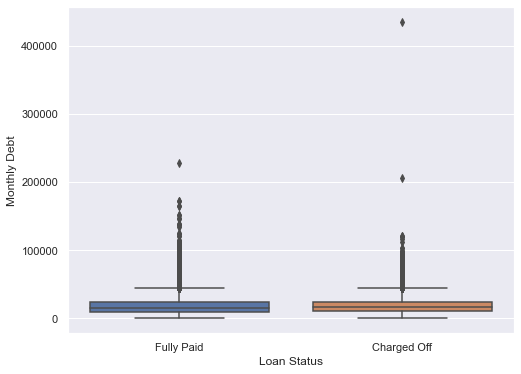

In [89]:
sns.boxplot(y = 'Monthly Debt', x = 'Loan Status', data = df)

There is no signifcant difference between monthly debt with the loan status

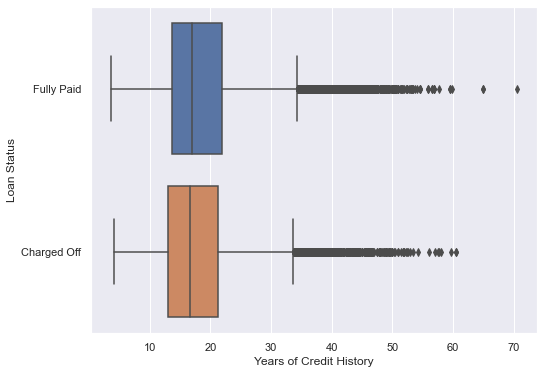

In [90]:
sns.boxplot(x = 'Years of Credit History', y = 'Loan Status', data = df)
sns.set(rc = {'figure.figsize':(8, 15)})

There are not much difference between the years of credit history and the loan status

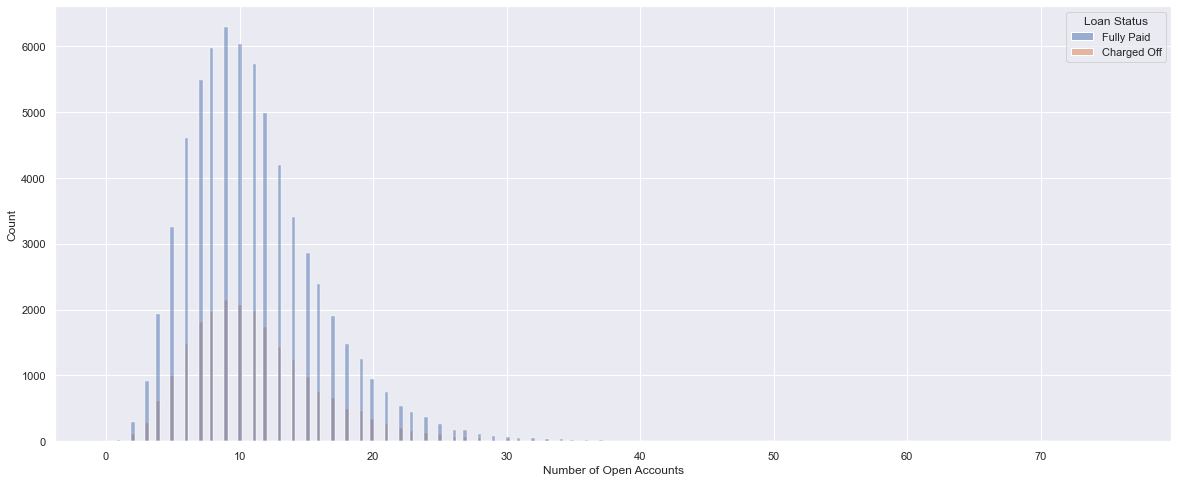

In [94]:
sns.histplot(x = 'Number of Open Accounts', hue = 'Loan Status', data = df)
sns.set(rc = {'figure.figsize':(20, 8)})

There are not much to see between the number of open accounts and the loan status

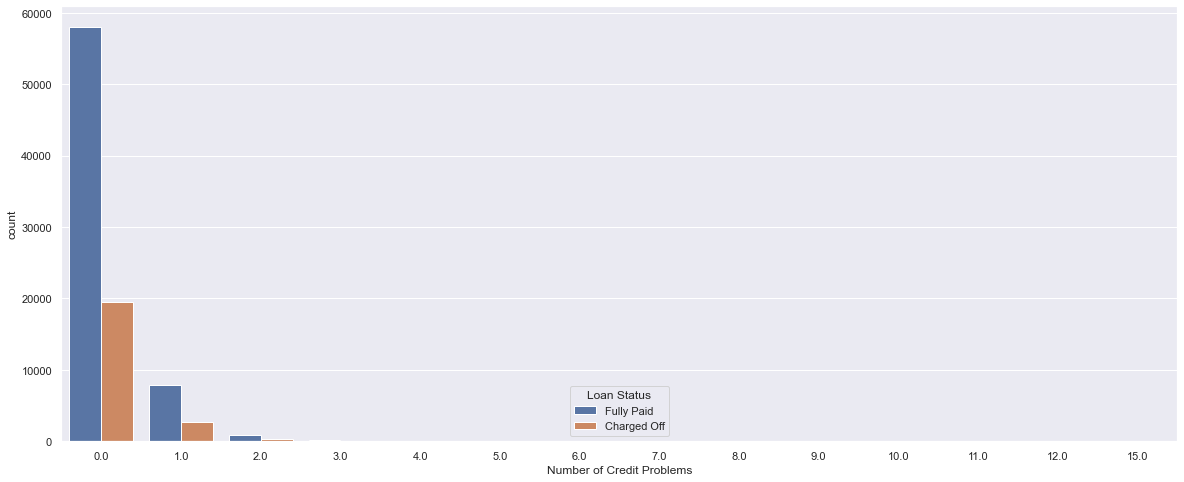

In [95]:
sns.countplot(x = 'Number of Credit Problems', hue = 'Loan Status', data = df)
sns.set(rc = {'figure.figsize':(5, 8)})

There are also not much to see from the number of credit problems with the loan status

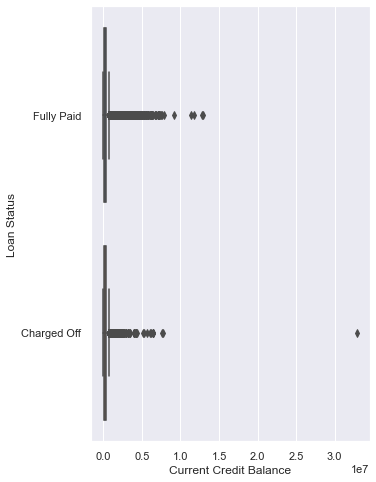

In [96]:
sns.boxplot(x = 'Current Credit Balance', y = 'Loan Status', data = df)
sns.set(rc = {'figure.figsize':(15, 6)})

There are also not much to see from the credit balance with the loan status

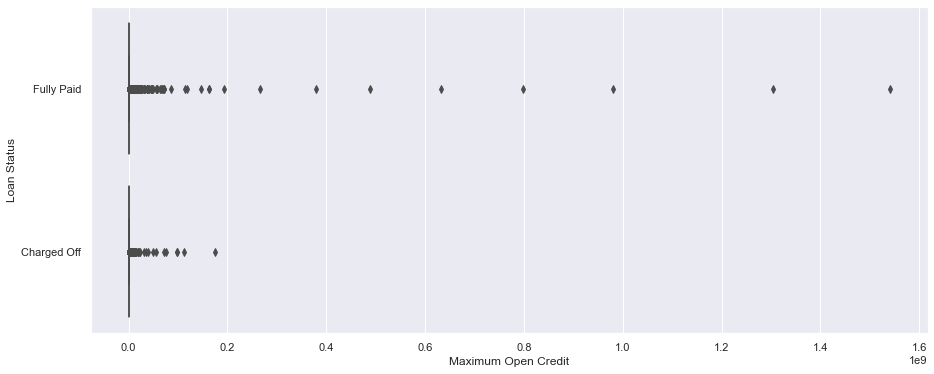

In [101]:
sns.boxplot(x = 'Maximum Open Credit', y = 'Loan Status', data = df)
sns.set(rc = {'figure.figsize':(20, 8)})

There are also not much to see from the maximum open credit with the loan status

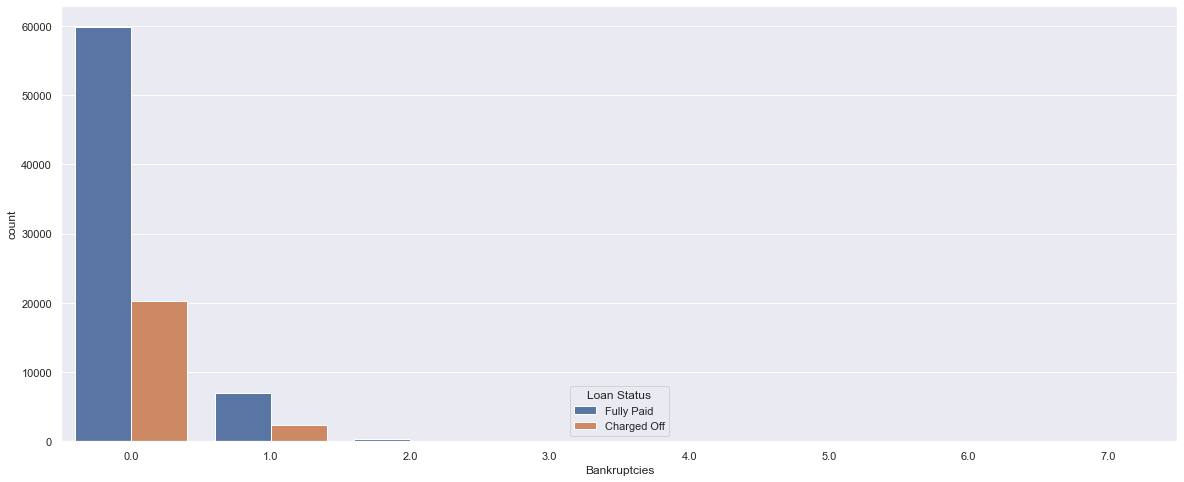

In [103]:
sns.countplot(x = 'Bankruptcies', hue = 'Loan Status', data = df)
sns.set(rc = {'figure.figsize':(5, 8)})

There are also not much to see from the number of bankruptcies with the loan status

Since we see that there are a lot of people that are being charged off despite having a high credit score number, we should try to see them in relation to some other variables.

<AxesSubplot:xlabel='Annual Income', ylabel='Credit Score'>

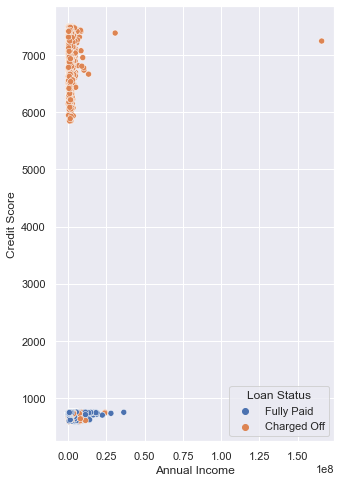

In [105]:
sns.scatterplot(x = 'Annual Income', y = 'Credit Score', hue = 'Loan Status' , data = df)

<AxesSubplot:xlabel='Years of Credit History', ylabel='Credit Score'>

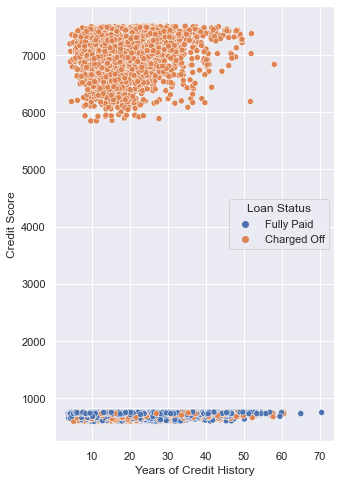

In [106]:
sns.scatterplot(x = 'Years of Credit History', y = 'Credit Score', hue = 'Loan Status' , data = df)

Try to compare the loan status specifically for the outliers in credit score.

In [107]:
Q1 = df['Credit Score'].quantile(0.25)
Q3 = df['Credit Score'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['Credit Score'] < Q1 - threshold * IQR) | (df['Credit Score'] > Q3 + threshold * IQR)]

<AxesSubplot:xlabel='Credit Score', ylabel='Count'>

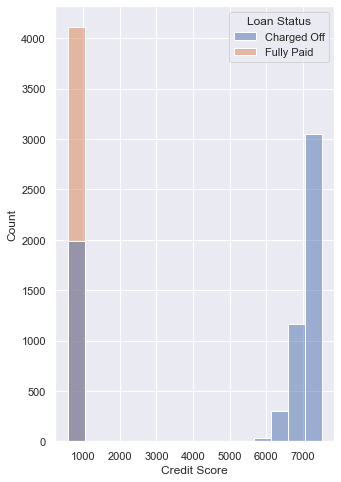

In [110]:
sns.histplot(x = outliers['Credit Score'], hue = outliers['Loan Status'])

We can totally see that the high credit score number have a very high charged off number. 

### Summary
- The customers that took the loan varies greatly. The customers years of experience varies between less than 1 year to more than 10 years, with most of the cusomters have 10+ years of experience. The majority of the customers have home mortgage or renting for place to live. The most common purpose of the loan is related to debt cosolidation followed by home improvement.
- There are a larger percentage of charged off for long term loans. Larger percentage of charge off can be seen from loans with purposes such as renewable energy and small business. So it might be a good idea to go for shorter term loans and avoiding riskier loan purposes.
- There are a lot of people with high credit score with charged off loans. Since this is not supposed to be the case, it might be good to reevaluate the credit scoring given to the customers.